In [58]:
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import *

In [84]:
# Create the dataset

#number of registers
n = 1000

#number of characteristics per register
p = 2

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.023)
Y = Y[:, np.newaxis]

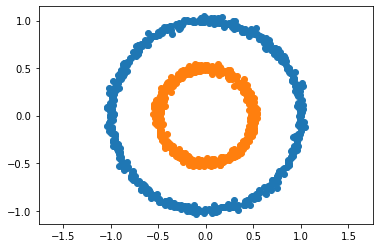

In [85]:
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1])
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1])
plt.axis("equal")
plt.show()

In [72]:
# Layer of the neural newtwork

class NeuralLayer():
    def __init__(self, nConnections, nNeurons, activationFunction):
        self.activationFunction = activationFunction
        self.b = 2*np.random.rand(1, nNeurons) - 1
        self.W = 2*np.random.rand(nConnections, nNeurons) - 1

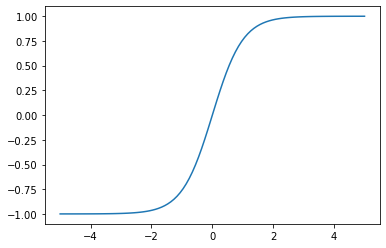

In [73]:
# Activation functions

sigmoid = (lambda x: 2/(1 + np.e ** (-2*x)) - 1,
           lambda x: (1-x*x))

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigmoid[0](_x))
plt.show()

In [74]:
def CreateNeuralNetwork(topology, activationFunction):
    
    NeuralNetwork = []

    for l, layer, in enumerate(topology[:-1]):

        NeuralNetwork.append(NeuralLayer(topology[l], topology[l+1], activationFunction))

    return NeuralNetwork

In [75]:
topology = [p, 8,8,8,8,8, 1]
neuralNetwork = CreateNeuralNetwork(topology, sigmoid)

In [76]:
l2Cost = (lambda predictedY, realY : np.mean((predictedY - realY) ** 2),
          lambda predictedY, realY : (predictedY - realY))

In [77]:
def TrainNN(neuralNetwork, X, Y, l2Cost, learningRatio = 0.5, train = True):

    out = [(None, X)]

    # Forward pass
    for l, layer in enumerate(neuralNetwork):

        z = out[-1][1] @ neuralNetwork[l].W + neuralNetwork[l].b
        a = neuralNetwork[l].activationFunction[0](z)

        out.append((z, a))

    #BackPropagation
    if train:
        #backward pass
        deltas = []
        for l in reversed(range(0, len(neuralNetwork))):

            z = out[l + 1][0]
            a = out[l + 1][1]

            if( l == len(neuralNetwork) - 1):
                # Calculate last layer
                deltas.insert(0, l2Cost[1](a, Y) * neuralNetwork[l].activationFunction[1](a))
            else:
                #Calculate previous layer
                deltas.insert(0, deltas[0] @ _W.T * neuralNetwork[l].activationFunction[1](a))

            _W = neuralNetwork[l].W
            #Gradient descent
            neuralNetwork[l].b = neuralNetwork[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * learningRatio
            neuralNetwork[l].W = neuralNetwork[l].W - out[l][1].T @ deltas[0]* learningRatio
            
    return out[-1][1]

In [12]:
#TrainNN(neuralNetwork, X, Y, l2Cost, 0.5)

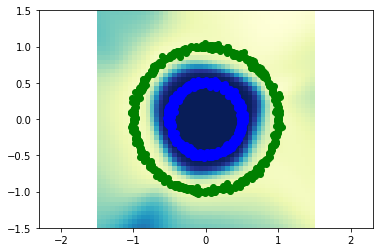

KeyboardInterrupt: 

In [86]:
import time
from IPython.display import clear_output

neuralNetwork = CreateNeuralNetwork(topology, sigmoid)

loss = []

for i in range(10000):
    pY = TrainNN(neuralNetwork, X, Y, l2Cost, learningRatio = 0.001)

    if(i % 25 == 0):
        loss.append(l2Cost[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = TrainNN(neuralNetwork, np.array([[x0, x1]]), Y, l2Cost, train = False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap = "YlGnBu")
        plt.axis("equal")

        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], color = 'green')
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], color = 'blue')
        clear_output(wait = True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)